# Comparison of Risk Measures

In [1]:
# Load required libraries
suppressMessages(library(quantmod))
suppressMessages(library(PerformanceAnalytics))
suppressMessages(library(tidyverse))
suppressMessages(library(openxlsx))
suppressMessages(library(data.table))
suppressMessages(library(lubridate))
plot_color <- rgb(115,35,60,maxColorValue = 255)


## Example using S&P 500 Index

We fetch S&P500 index to this date. We could compare the performance of this market with the later analysis for the Lehman Brothers stock price.

[1] "GSPC"


 S&P 500 Risk Measures:
 Volatility (Standard Deviation): 0.01337031 
 95% VaR (Value at Risk): -0.01865838 
 95% CVaR (Conditional VaR): -0.0326392 
 Mean Regret (Avg Negative Return): -0.009002161 
 Semi-Variance (Downside Risk): 0.0002061291 


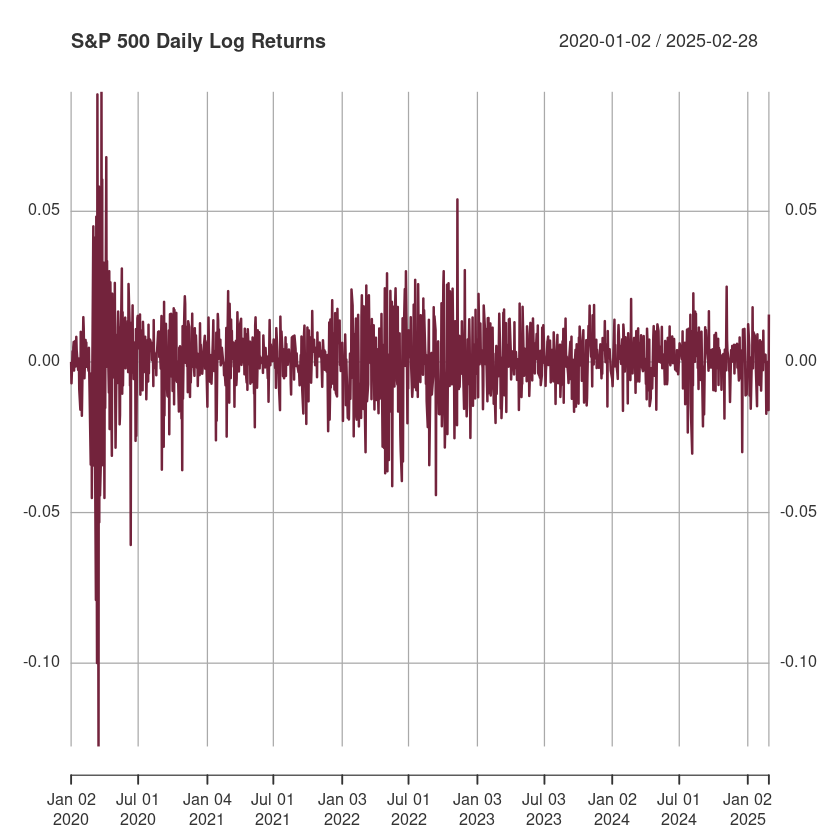

In [2]:
mat_risk_measures <- matrix(0,5,2) ; rownames(mat_risk_measures) <- c("Volatility","VaR","CVaR","Mean Regret","Semi Var")
colnames(mat_risk_measures) <- c("S&P 500","Lehman Brothers") 

# Fetch S&P 500 data (SPY ETF as a proxy)
getSymbols("^GSPC", src = "yahoo", from = "2020-01-01", to = Sys.Date())

# Convert to data frame and calculate daily log returns
sp500 <- Cl(GSPC)  # Closing prices
sp500_returns <- dailyReturn(sp500, type = "log")  # Log returns

# Remove NA values
sp500_returns <- na.omit(sp500_returns)
plot(sp500_returns, main = "S&P 500 Daily Log Returns", col = plot_color)

# Risk measures
volatility <- sd(sp500_returns)  ; mat_risk_measures["Volatility","S&P 500"] <- volatility # Standard deviation (Volatility)
VaR_95 <- VaR(sp500_returns, p = 0.95, method = "historical") ; mat_risk_measures["VaR","S&P 500"] <- VaR_95 # 95% Value at Risk
CVaR_95 <- CVaR(sp500_returns, p = 0.95, method = "historical") ; mat_risk_measures["CVaR","S&P 500"] <- CVaR_95  # 95% Conditional VaR
mean_regret <- mean(sp500_returns[sp500_returns < 0]) ; mat_risk_measures["Mean Regret","S&P 500"] <- mean_regret  # Mean of all negative returns
semi_variance <- mean(sp500_returns[sp500_returns < 0]^2) ; mat_risk_measures["Semi Var", "S&P 500"] <- semi_variance  # Average squared negative returns



# Print Results
cat("\n S&P 500 Risk Measures:\n")
cat(" Volatility (Standard Deviation):", volatility, "\n")
cat(" 95% VaR (Value at Risk):", VaR_95, "\n")
cat(" 95% CVaR (Conditional VaR):", CVaR_95, "\n")
cat(" Mean Regret (Avg Negative Return):", mean_regret, "\n")
cat(" Semi-Variance (Downside Risk):", semi_variance, "\n")

We calculate manually the risk measures to clarify the corresponding definition.

In [3]:
aux <- sp500_returns
VaR_aux <- -quantile(aux,probs = 0.05)
CVaR_aux <- -mean(aux[aux < quantile(aux,probs = 0.05)])

cat("Manual VaR: ",round(VaR_aux,4))
cat("\nManual CVaR: ",round(CVaR_aux,4))

Manual VaR:  0.0187
Manual CVaR:  0.0326

- What is the nature of this index?
- Could we use it to explain how this graphs explain economics crashes?

## Lehman Brothers Holdings Capital Trust Analysis

Now, we will try to do the same analysis for the `Lehman_Brothers_Open_Price.xlsx` data set

In [4]:
dt_lehman_brothers <- fread("Lehman_Brothers_Open_Close_Prices.csv")
dt_lehman_brothers <- unique(dt_lehman_brothers, by = "Date")

We visualise this data to check that we actually see the bankruptcy on September 2008.

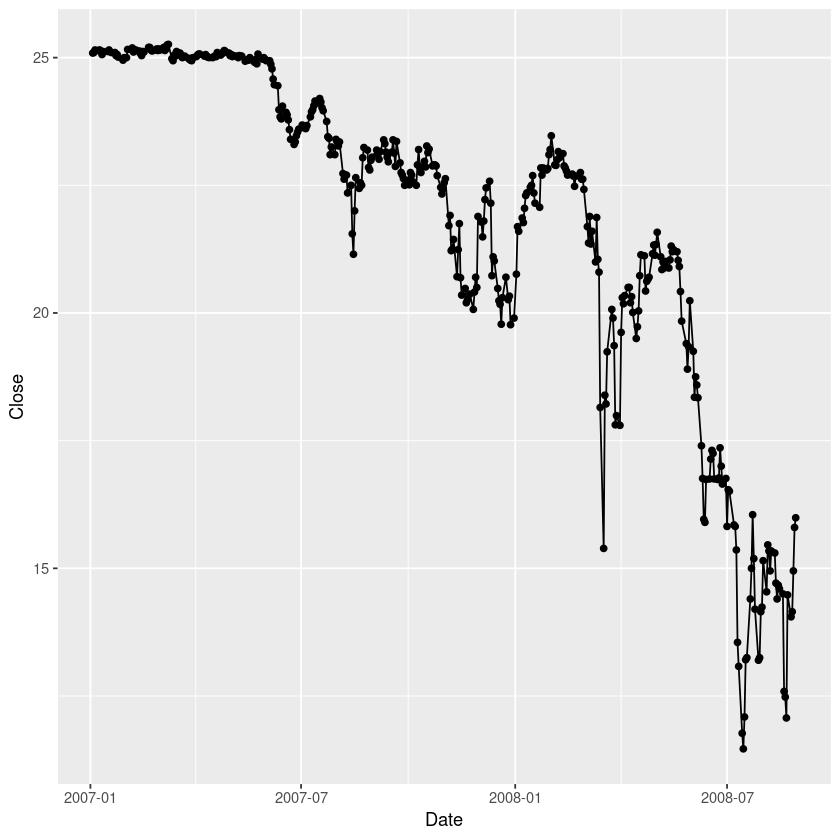

In [5]:
ggplot(filter(dt_lehman_brothers,Date < ymd("2008-9-1")),aes(x=Date,y=Close))+geom_point()+geom_line()

Afterwards, we calculate the **risk measures** associated 


 Lehman Brothers Capital Risk Measures:
 Volatility (Standard Deviation): 0.02833056 
 95% VaR (Value at Risk): -0.03854828 
 95% CVaR (Conditional VaR): -0.07293755 
 Mean Regret (Avg Negative Return): -0.01506447 
 Semi-Variance (Downside Risk): 0.0008020115 


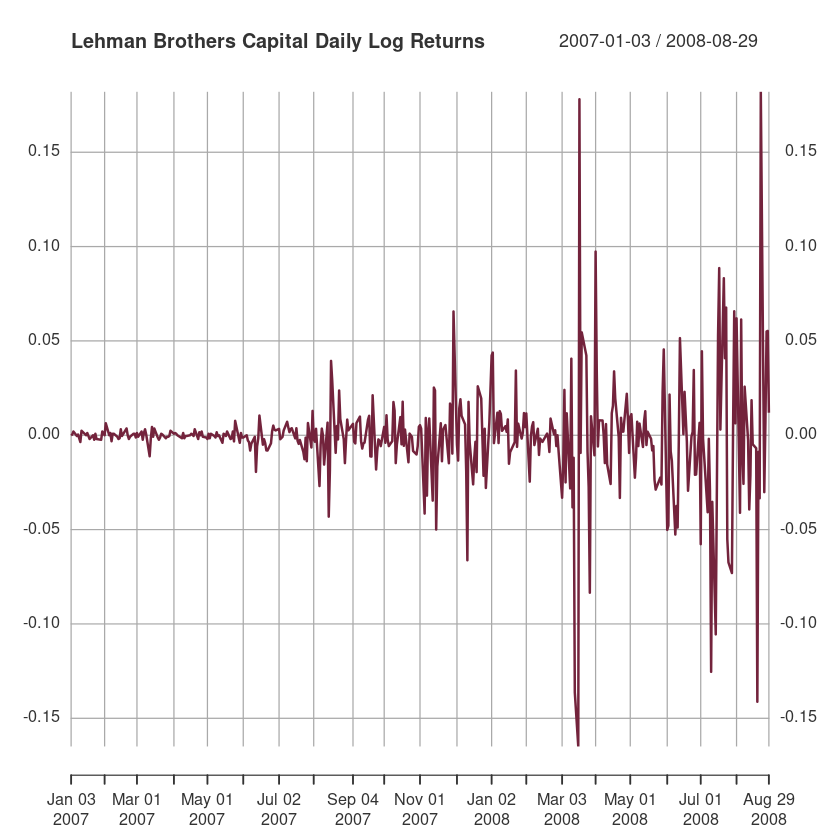

In [6]:
# Choose study period
dt_lehman_brothers <- filter(dt_lehman_brothers,Date < ymd("2008-9-1"))

lehman_brothers_stock_data <- xts(dt_lehman_brothers$Close, 
                                order.by = as.Date(dt_lehman_brothers$Date))

lehman_brothers_daily_returns <- dailyReturn(lehman_brothers_stock_data, type = "log")

plot(lehman_brothers_daily_returns, main = "Lehman Brothers Capital Daily Log Returns", 
                                   col = plot_color)

volatility <- sd(lehman_brothers_daily_returns)  ; mat_risk_measures["Volatility","Lehman Brothers"] <- volatility # Standard deviation (Volatility)
VaR_95 <- VaR(lehman_brothers_daily_returns, p = 0.95, method = "historical") ; mat_risk_measures["VaR","Lehman Brothers"] <- VaR_95 # 95% Value at Risk
CVaR_95 <- CVaR(lehman_brothers_daily_returns, p = 0.95, method = "historical") ; mat_risk_measures["CVaR","Lehman Brothers"] <- CVaR_95  # 95% Conditional VaR
mean_regret <- mean(lehman_brothers_daily_returns[lehman_brothers_daily_returns < 0]) ; mat_risk_measures["Mean Regret","Lehman Brothers"] <- mean_regret  # Mean of all negative returns
semi_variance <- mean(lehman_brothers_daily_returns[lehman_brothers_daily_returns < 0]^2) ; mat_risk_measures["Semi Var", "Lehman Brothers"] <- semi_variance  # Average squared negative returns

# Print Results
cat("\n Lehman Brothers Capital Risk Measures:\n")
cat(" Volatility (Standard Deviation):", volatility, "\n")
cat(" 95% VaR (Value at Risk):", VaR_95, "\n")
cat(" 95% CVaR (Conditional VaR):", CVaR_95, "\n")
cat(" Mean Regret (Avg Negative Return):", mean_regret, "\n")
cat(" Semi-Variance (Downside Risk):", semi_variance, "\n")

We want to see a comparison between the two data sets and check the discrepancy of the risk measures

In [7]:
round(mat_risk_measures,5)

,S&P 500,Lehman Brothers
Volatility,0.01337,0.02833
VaR,-0.01866,-0.03855
CVaR,-0.03264,-0.07294
Mean Regret,-0.00900,-0.01506
Semi Var,0.00021,0.00080


We print the table in LaTeX code.

In [8]:
library(xtable)
print(xtable(mat_risk_measures,caption = "Value of the risk measures for S&P 500 index, and Lehman Brothers' stock price",
            label = "tab:risk_measures",digits = 5))

% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Sat Mar  1 14:55:44 2025
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & S\&P 500 & Lehman Brothers \\ 
  \hline
Volatility & 0.01337 & 0.02833 \\ 
  VaR & -0.01866 & -0.03855 \\ 
  CVaR & -0.03264 & -0.07294 \\ 
  Mean Regret & -0.00900 & -0.01506 \\ 
  Semi Var & 0.00021 & 0.00080 \\ 
   \hline
\end{tabular}
\caption{Value of the risk measures for S&P 500 index, and Lehman Brothers' stock price} 
\label{tab:risk_measures}
\end{table}
